In [3]:
import pandas as pd
import numpy as np

# read data and assign column names [time, loadcell1, loadcell2]
data = pd.read_csv(r'C:\Users\alagi\Documents\Paraglider\data\2025-04-21T05_49_36.610487_output.csv', names=['time', 'loadcell1', 'loadcell2'])
# convert first column to datetime
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], format="%Y-%m-%dT%H:%M:%S.%f")
data.head()
# count FALSE or -1 values in each column
false_counts = (data == "False").sum()
print(false_counts)
data.head()

time          0
loadcell1    25
loadcell2     8
dtype: int64


,time,loadcell1,loadcell2
0,2025-04-21 05:49:36.704759,1352,483226
1,2025-04-21 05:49:36.798404,1511,486216
2,2025-04-21 05:49:37.255815,1678,False
3,2025-04-21 05:49:37.347803,1543,490467
4,2025-04-21 05:49:37.530976,985,481584


float64


C:\Users\alagi\AppData\Local\Temp\ipykernel_8728\4115390979.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("False", -1)


Text(0, 0.5, 'Load Cell ADC Value')

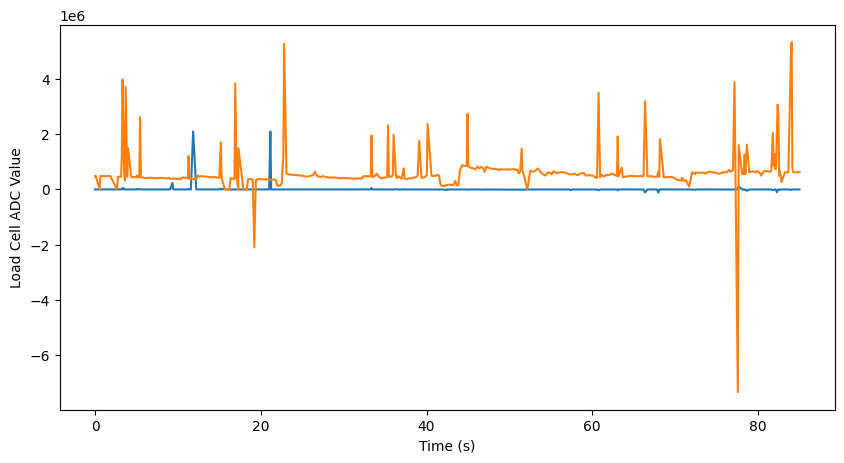

In [4]:
import matplotlib.pyplot as plt

# replace False with -1
data = data.replace("False", -1)
# Convert loadcell columns to numeric (in case they are still strings)
data['loadcell1'] = pd.to_numeric(data['loadcell1'], errors='coerce')
data['loadcell2'] = pd.to_numeric(data['loadcell2'], errors='coerce')
data['time'] = pd.to_datetime(data['time'], errors='coerce')
data['time'] = (data['time'] - data['time'].iloc[0]).dt.total_seconds()
print(data['time'].dtype)
# plot load cell data
plt.figure(figsize=(10, 5))
plt.plot(data['time'], data['loadcell1'])
plt.plot(data['time'], data['loadcell2'])
plt.xlabel('Time (s)')
plt.ylabel('Load Cell ADC Value')

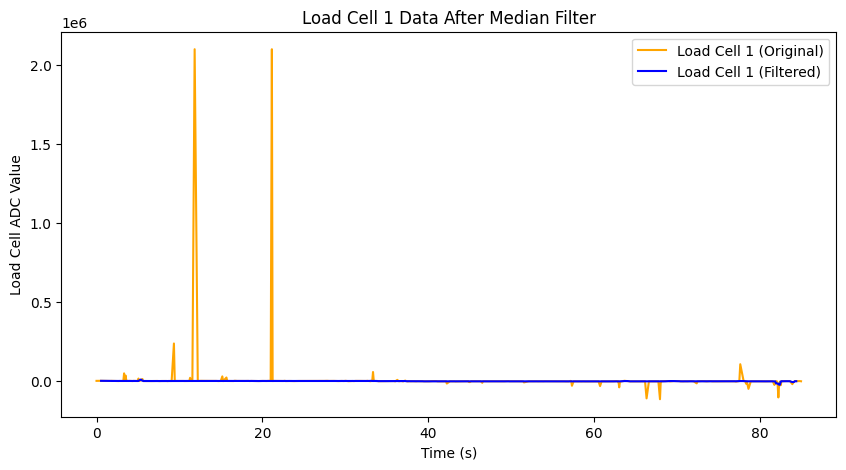

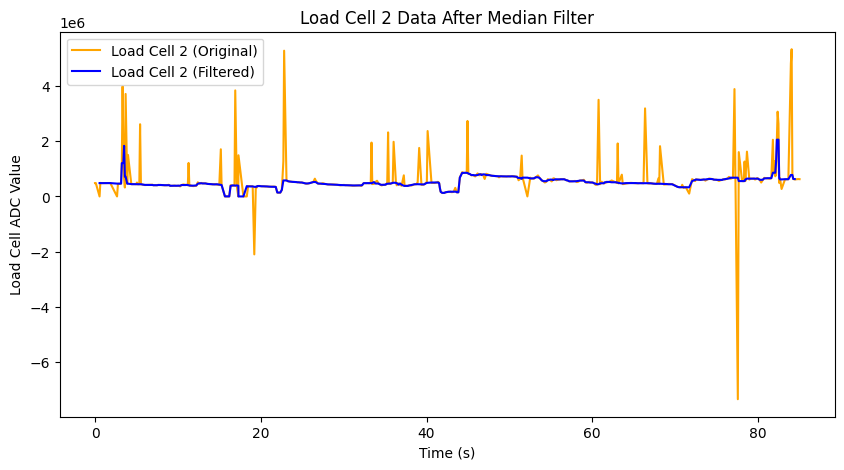

In [5]:
# apply a median filter to the loadcell columns
loadcell1 = data['loadcell1'].rolling(window=5, center=True).median()
loadcell2 = data['loadcell2'].rolling(window=5, center=True).median()

# plot load cell data before and after filtering
plt.figure(figsize=(10, 5))
plt.plot(data['time'], data['loadcell1'], label='Load Cell 1 (Original)', color='orange')
plt.plot(data['time'], loadcell1, label='Load Cell 1 (Filtered)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Load Cell ADC Value')
plt.title('Load Cell 1 Data After Median Filter')
plt.legend()

plt.figure(figsize=(10, 5))
plt.plot(data['time'], data['loadcell2'], label='Load Cell 2 (Original)', color='orange')
plt.plot(data['time'], loadcell2, label='Load Cell 2 (Filtered)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Load Cell ADC Value')
plt.title('Load Cell 2 Data After Median Filter')
plt.legend()

ADC = 51734.307692 * Load + 45212.33
R^2: 0.9971


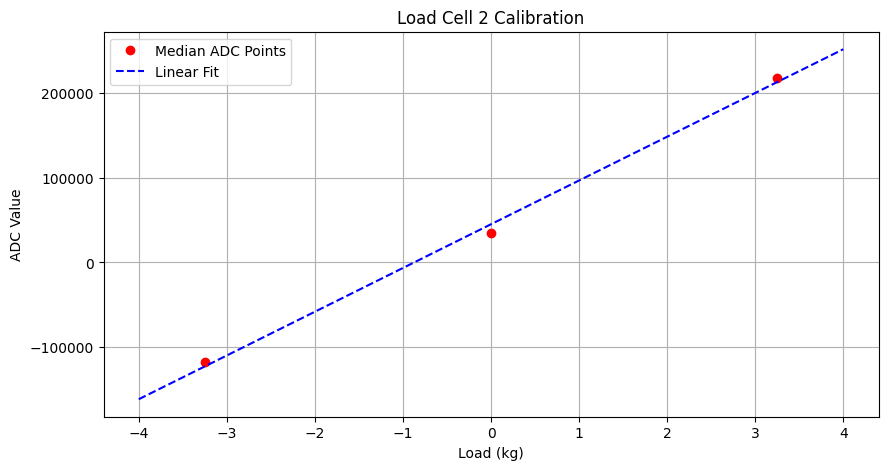

In [6]:
# calibration data for loadcells
# first row is the load values column titles

from sklearn.linear_model import LinearRegression

calibration_data2 = [
    [0, -3.25, 3.25],
    [34528, -117717, 218787],
    [34532, -117737, 218856],
    [34557, -117722, 219226],
    [34577, -117748, 218932],
    [34507, -117740, 218575],
    [34534, -117682, 218477],
    [34587, -117726, 218461],
    [34608, -117754, 218489],
    [34618, -117701, 218636],
    [34623, -117714, 218817],
    [34666, -117697, 218836],
    [34675, -117668, 218828],
    [34663, -117675, 218607],
    [34651, -117728, 218498],
    [34691, -117694, 218529],
    [34731, -117662, 218477],
    [34694, -117687, 218518],
    [34744, -117705, 218684],
    [34770, -117697, 218709],
    [34770, -117673, 218643],
    [34760, -117683, 218527],
    [34756, -117685, 218551],
    [34747, -117716, 218557],
    [34716, -117673, 218523],
    [34704, -117645, 218525],
    [34721, -117659, 218652],
    [34730, -117816, 218724],
    [34765, -117748, 218788],
    [34771, -117697, 218761],
    [34784, -117698, 218597],
    [34766, -117674, 218591],
    [34753, -117726, 218498],
    [34823, -117707, 218410],
    [34815, -117755, 218543],
    [34840, -117690, 218650],
    [34837, -117760, 218719],
    [34801, -117687, 218787],
    [34829, -117718, 218597],
    [34854, -117688, 218519],
    [34876, -117693, 218484],
    [34871, -117640, 218460],
    [34855, -117683, 218514],
    [34825, -117726, 218651],
    [34860, -117700, 218682],
    [34881, -117671, 218584],
    [34862, -117739, 218476],
    [34789, -117690, 218451],
    [34829, -117715, 218459],
    [34828, -117685, 218402],
    [34859, -117750, 218362],
    [34932, -117753, 218456],
]
# Convert to DataFrame using column-wise load classification
df = pd.DataFrame(calibration_data2, columns=['zero', 'negative', 'positive'])
df = df.drop(index=0)  # Remove the load header row

# Compute median ADC readings for each known load
adc_zero = df['zero'].median()
adc_negative = df['negative'].median()
adc_positive = df['positive'].median()

# Arrange in matching order with loads
adc_values = np.array([adc_negative, adc_zero, adc_positive])
loads = np.array([-3.25, 0, 3.25])

# Fit linear regression: ADC = m * load + b
model2 = LinearRegression().fit(loads.reshape(-1, 1), adc_values.reshape(-1, 1))

# Output the model
print(f"ADC = {model2.coef_[0][0]:.6f} * Load + {model2.intercept_[0]:.2f}")
print(f'R^2: {model2.score(loads.reshape(-1, 1), adc_values.reshape(-1, 1)):.4f}')
# Plot calibration points and fitted line
plt.figure(figsize=(10, 5))
plt.plot(loads, adc_values, 'ro', label='Median ADC Points')

# Generate smooth line
load_range = np.linspace(-4, 4, 100)
adc_pred = model2.predict(load_range.reshape(-1, 1))

plt.plot(load_range, adc_pred, 'b--', label='Linear Fit')
plt.xlabel("Load (kg)")
plt.ylabel("ADC Value")
plt.title("Load Cell 2 Calibration")
plt.legend()
plt.grid(True)
plt.show()

ADC = 51734.307692 * Load + 45212.33
R^2 = 0.9971


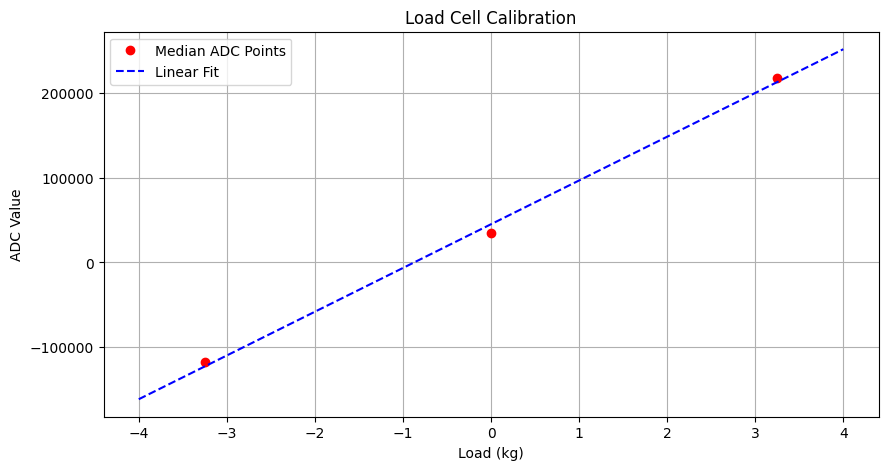

In [7]:
# calibration data for loadcells
# first row is the load values column titles

from sklearn.linear_model import LinearRegression

calibration_data1 = [
    [0, -3.25, 3.25],
    [3046, -149935, 52200],
    [3062, -149928, 52280],
    [3055, -149995, 52249],
    [3060, -149959, 52234],
    [3077, -149901, 52279],
    [3044, -149865, 52285],
    [3031, -149898, 52263],
    [3081, -149846, 52216],
    [3111, -149902, 52290],
    [3100, -149914, 52316],
    [3103, -149950, 52345],
    [3132, -149908, 52306],
    [3130, -149936, 52305],
    [3111, -149910, 52358],
    [3123, -149922, 52356],
    [3095, -149920, 52332],
    [3077, -149915, 52297],
    [3069, -149964, 52319],
    [3110, -149886, 52288],
    [3108, -149912, 52299],
    [3115, -149907, 52288],
    [3138, -149908, 52333],
    [3133, -149867, 52327],
    [3116, -149936, 52308],
    [3076, -149929, 52340],
    [3102, -149898, 52340],
    [3139, -149853, 52339],
    [3154, -149834, 52382],
    [3138, -149863, 52367],
    [3125, -149904, 52376],
    [3094, -149872, 52393],
    [3072, -149878, 52327],
    [3105, -149918, 52295],
    [3102, -149974, 52328],
    [3111, -149905, 52371],
    [3096, -149897, None],
    [3083, -149958, 52271],
    [3070, -149910, 52304],
    [3098, -149861, 52305],
    [3117, -149883, 52309],
    [3109, -149871, 52331],
    [3097, -149876, 52319],
    [3098, -149888, 52321],
    [3102, -149948, 52320],
    [3102, -149921, 52325],
    [3121, -149863, None],
    [3097, -149890, 418807],
    [3127, -149892, 52349],
    [3123, -149869, 52354],
    [3091, -149845, 52324],
    [3050, -149848, 52292],
]

# Convert to DataFrame using column-wise load classification
df = pd.DataFrame(calibration_data2, columns=['zero', 'negative', 'positive'])
df = df.drop(index=0)  # Remove the load header row

# Compute median ADC readings for each known load
adc_zero = df['zero'].median()
adc_negative = df['negative'].median()
adc_positive = df['positive'].median()

# Arrange in matching order with loads
adc_values = np.array([adc_negative, adc_zero, adc_positive])
loads = np.array([-3.25, 0, 3.25])

# Fit linear regression: ADC = m * load + b
model1 = LinearRegression().fit(loads.reshape(-1, 1), adc_values.reshape(-1, 1))

# Output the model
print(f"ADC = {model1.coef_[0][0]:.6f} * Load + {model1.intercept_[0]:.2f}")
print(f"R^2 = {model1.score(loads.reshape(-1, 1), adc_values.reshape(-1, 1)):.4f}")

# Plot calibration points and fitted line
plt.figure(figsize=(10, 5))
plt.plot(loads, adc_values, 'ro', label='Median ADC Points')

# Generate smooth line
load_range = np.linspace(-4, 4, 100)
adc_pred = model1.predict(load_range.reshape(-1, 1))

plt.plot(load_range, adc_pred, 'b--', label='Linear Fit')
plt.xlabel("Load (kg)")
plt.ylabel("ADC Value")
plt.title("Load Cell Calibration")
plt.legend()
plt.grid(True)
plt.show()

          time  loadcell1  loadcell2
0     0.000000       1352     483226
1     0.093645       1511     486216
2     0.551056       1678         -1
3     0.643044       1543     490467
4     0.826217        985     481584
..         ...        ...        ...
454  84.142212      -6401     777215
455  84.244043       -861     632916
456  84.428128       -757     614995
457  84.832506         -1     628827
458  85.006010      -1153     625862

[459 rows x 3 columns]


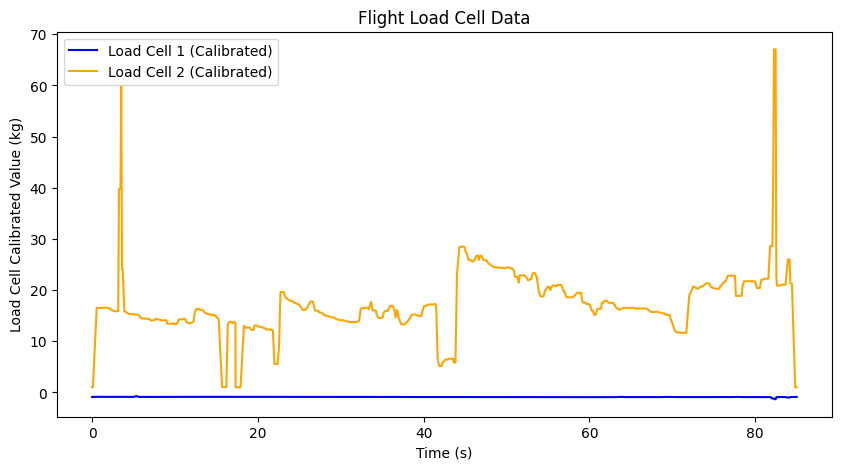

In [10]:
loadcell1 = pd.to_numeric(loadcell1, errors='coerce').fillna(-1)
loadcell2 = pd.to_numeric(loadcell2, errors='coerce').fillna(-1)

# model 2 ADC = 51734.307692 * Load + 45212.33
loadcell1_calibrated = (loadcell1 - 45212.33) / 51734.307692
loadcell2_calibrated = (loadcell2 + 31494.33) / 31111.230769
# median filter the calibrated loadcell data
#loadcell1_filtered = pd.Series(loadcell1_calibrated.flatten()).rolling(window=5, center=True).median()
#loadcell2_filtered = pd.Series(loadcell2_calibrated.flatten()).rolling(window=5, center=True).median()

# plot calibrated loadcell data
plt.figure(figsize=(10, 5))
print(data)
plt.plot(data['time'], loadcell1_calibrated, label='Load Cell 1 (Calibrated)', color='blue')
plt.plot(data['time'], loadcell2_calibrated, label='Load Cell 2 (Calibrated)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Load Cell Calibrated Value (kg)')
plt.title('Flight Load Cell Data')
plt.legend()
